In [180]:
import pandas
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import squarify
from circlify import circlify

In [181]:
#1 Завантажте набір даних
file = pandas.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", sep=",",
encoding="utf8", engine='python')

In [182]:
file = file.drop(['link','old_price', 'Unnamed: 0'],  axis=1) 
file['designer'] = file['designer'].replace(r'^.{3}\..*', value='No information',  regex=True)
designers_split = [sorted(item.split('/')) for item in file['designer']]
file['designer'] = ['/'.join(item) for item in designers_split]

# 40 ways to visualize the same data 

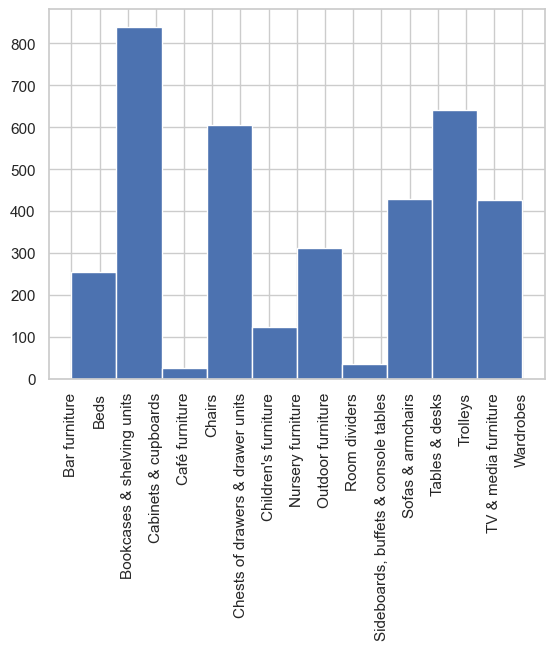

In [183]:
file['category'].hist()
plt.xticks(rotation=90)
plt.show()

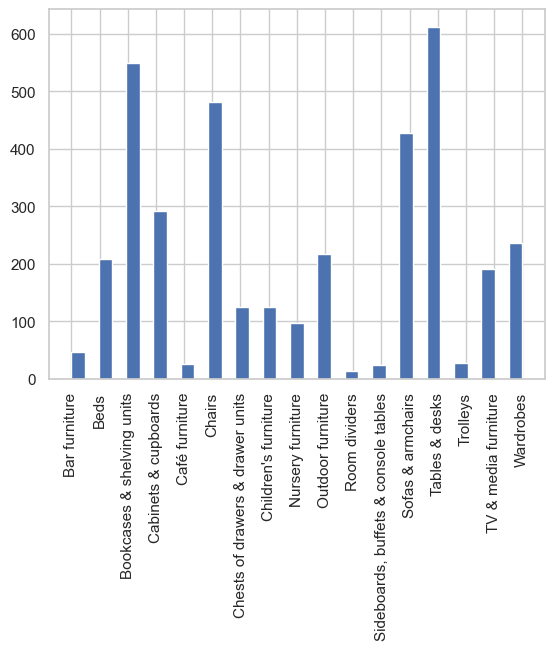

In [184]:
plt.hist(file["category"], bins=33)
plt.xticks(rotation=90)
plt.show()

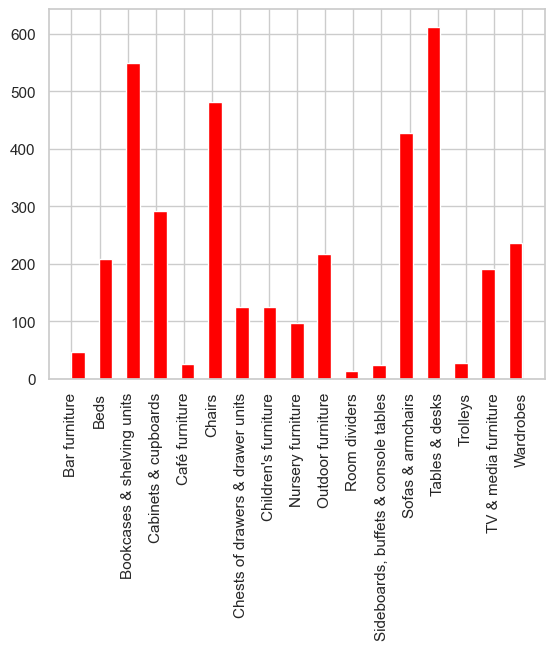

In [185]:
plt.hist(file["category"],bins = 33, color = 'red')
plt.xticks(rotation=90)
plt.show()

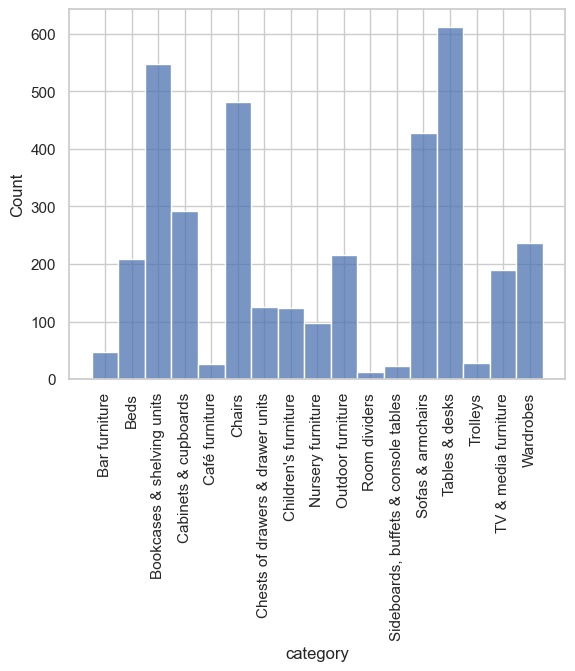

In [186]:
sns.histplot(file['category'])
plt.xticks(rotation=90)
plt.show()

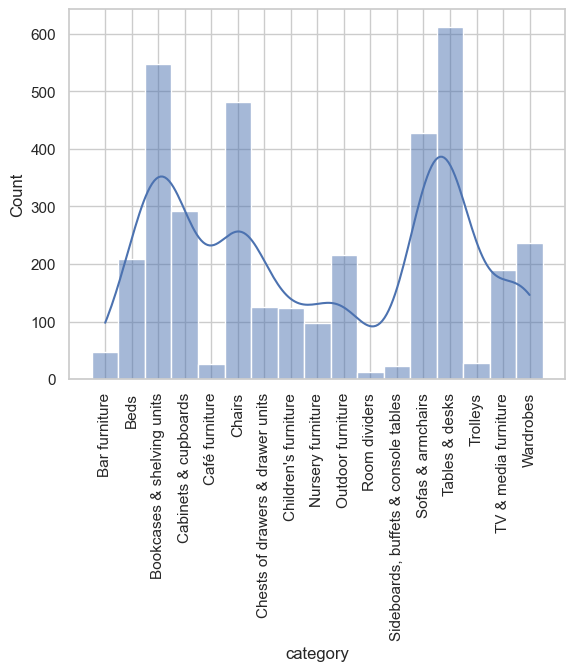

In [187]:
sns.histplot(file['category'], kde=True)
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Y Label')

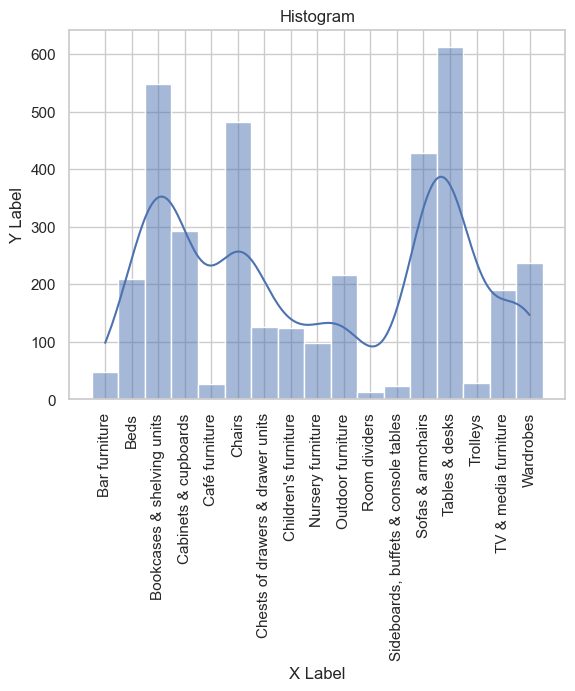

In [188]:
sns.set(style="whitegrid")
sns.histplot(file['category'], kde=True)
plt.xticks(rotation=90)
plt.title('Histogram')
plt.xlabel('X Label')
plt.ylabel('Y Label')

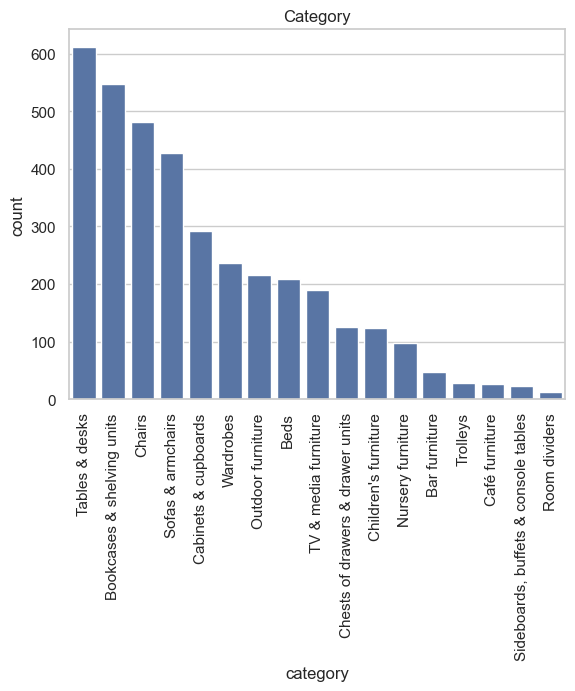

In [189]:
category_counts = file['category'].value_counts().sort_values(ascending=False)
plt.figure()
sns.countplot(x=file['category'], data=file, order=category_counts.index)
plt.xticks(rotation=90)
plt.title('Category')
plt.show()


C:\Users\vika\AppData\Local\Temp\ipykernel_9424\2148568559.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'category', y = 'price', data = file, estimator= numpy.mean, palette = 'magma')


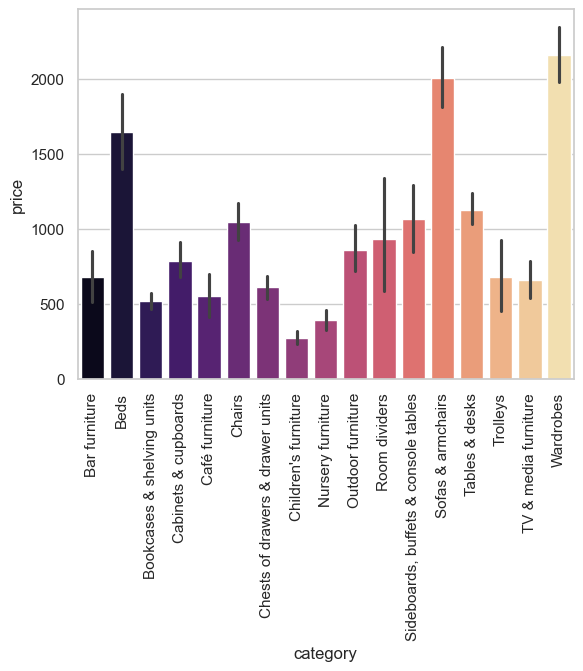

In [190]:
sns.barplot(x = 'category', y = 'price', data = file, estimator= numpy.mean, palette = 'magma')
plt.xticks(rotation=90)
plt.show();

C:\Users\vika\AppData\Local\Temp\ipykernel_9424\216053459.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'price', y = 'category', data = file, estimator= numpy.mean, palette = 'magma')


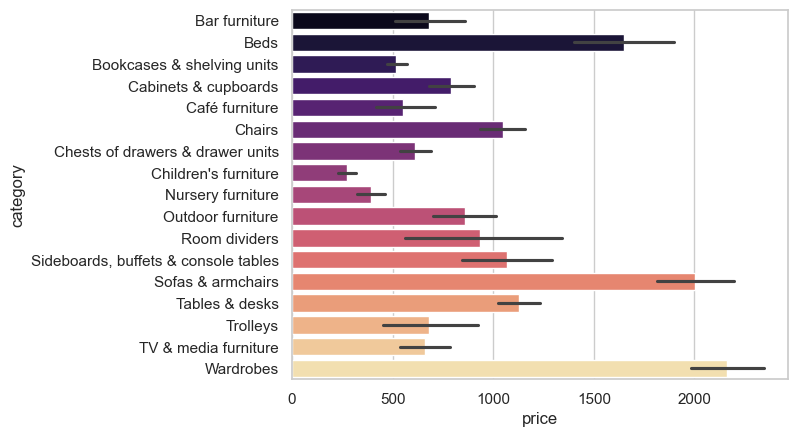

In [191]:
sns.barplot(x = 'price', y = 'category', data = file, estimator= numpy.mean, palette = 'magma')
plt.show();

C:\Users\vika\AppData\Local\Temp\ipykernel_9424\1543678675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='category', data=file, estimator=np.sum, palette='magma')


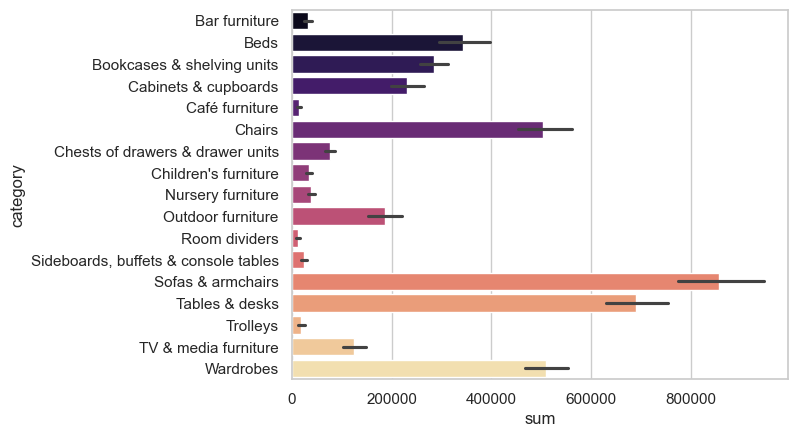

In [192]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='price', y='category', data=file, estimator=np.sum, palette='magma')
plt.xlabel('sum')
plt.show()


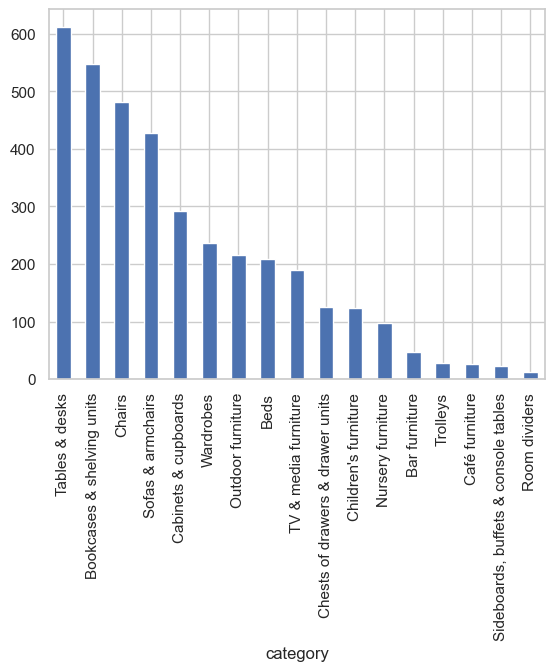

In [193]:
file['category'].value_counts().sort_values(ascending=False).plot(kind='bar', rot=90)
plt.show()


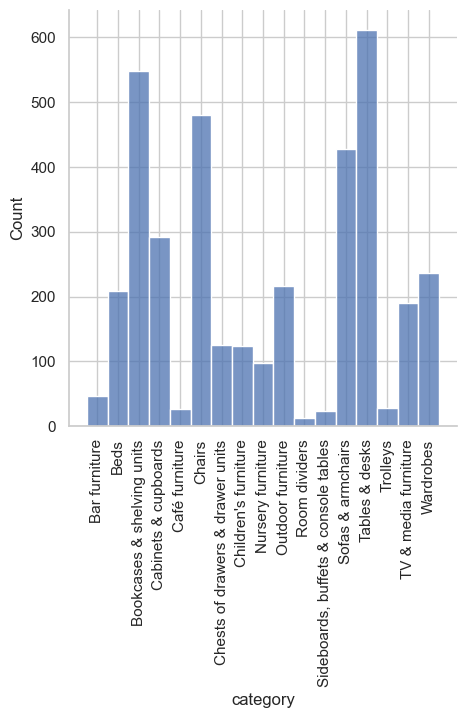

In [194]:
sns.displot(file['category'])
plt.xticks(rotation=90)
plt.show()

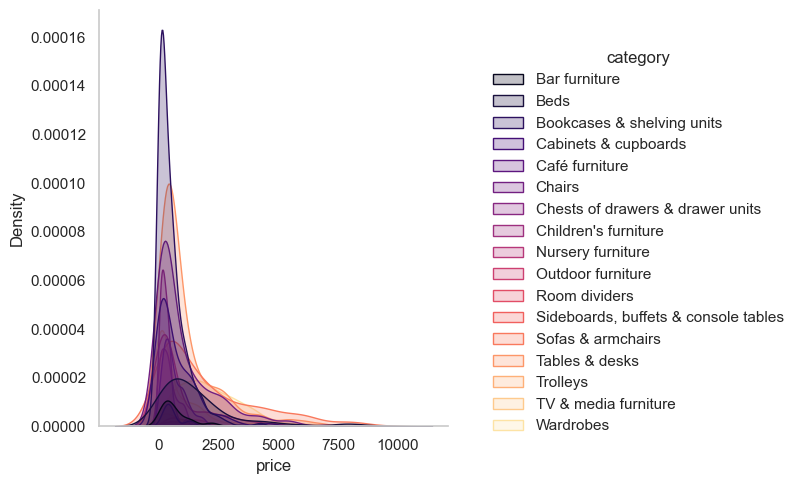

In [195]:
sns.displot(x='price', hue='category', data = file, palette= 'magma', fill = True, kind= 'kde')
plt.grid()
plt.show()

На графике ядерной оценки плотности (KDE) ось x представляет собой непрерывную оценку плотности вероятности, а не фактические значения данных. По умолчанию seaborn строит KDE для всего диапазона значений, которые он видит в данных, даже если они выходят за пределы фактических значений.


Если вы хотите ограничить область KDE до фактических значений данных, вы можете использовать параметр cut в sns.kdeplot() или sns.displot()
Установка cut=0 позволит обрезать KDE на нуле, и график больше не будет расширяться за пределы фактических значений данных.

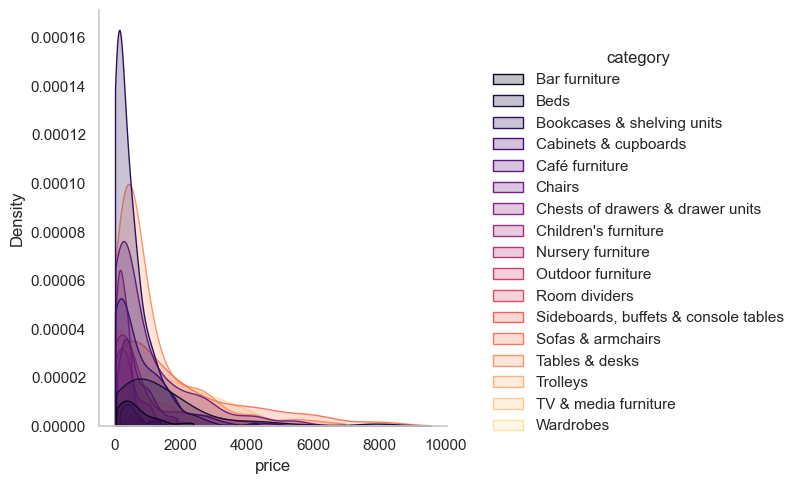

In [196]:
sns.displot(x='price', hue='category', data = file, palette= 'magma', fill = True, kind= 'kde', cut=0)
plt.grid()
plt.show()

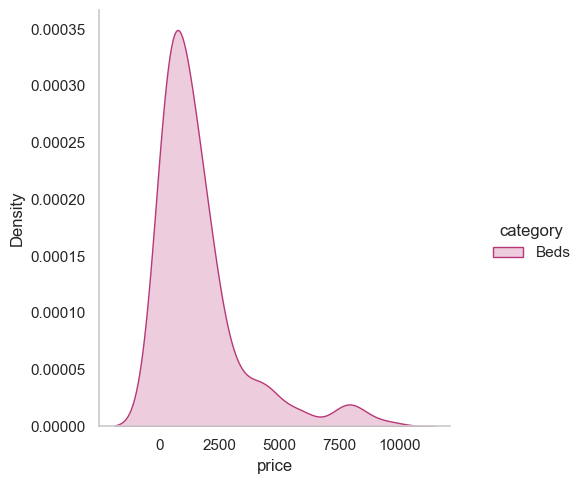

In [197]:
sns.displot(x='price', hue='category', data=file[file['category'] == 'Beds'], palette='magma', fill=True, kind='kde')
plt.grid()
plt.show()


In [198]:
file['price'].min(), file['price'].mean(), file['price'].median()


(3.0, 1078.208419057932, 544.7)

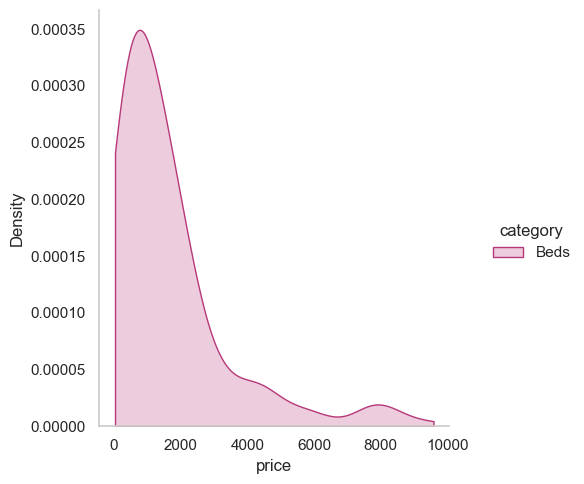

In [199]:
sns.displot(x='price', hue='category', data=file[file['category'] == 'Beds'], palette='magma', fill=True, kind='kde', cut=0)
plt.grid()
plt.show()


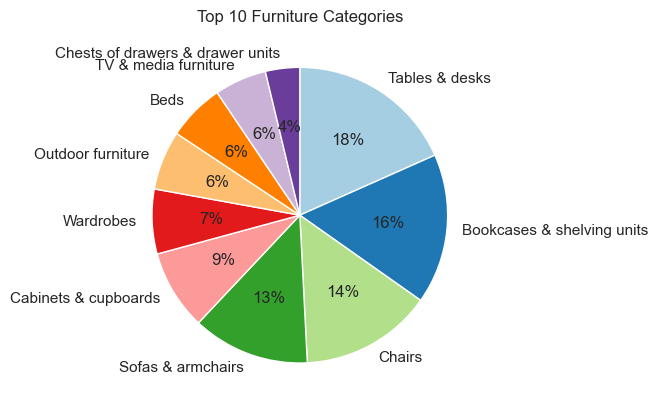

In [200]:
# Получаем количество элементов в каждой категории и ограничиваемся 10 самыми популярными категориями
count = file['category'].value_counts().head(10)

# Построение круговой диаграммы
plt.pie(count.values, labels=count.index, colors=sns.color_palette("Paired"),
        autopct='%1.0f%%', startangle=90, counterclock=False)
plt.title('Top 10 Furniture Categories')  # Установка заголовка графика
plt.show()

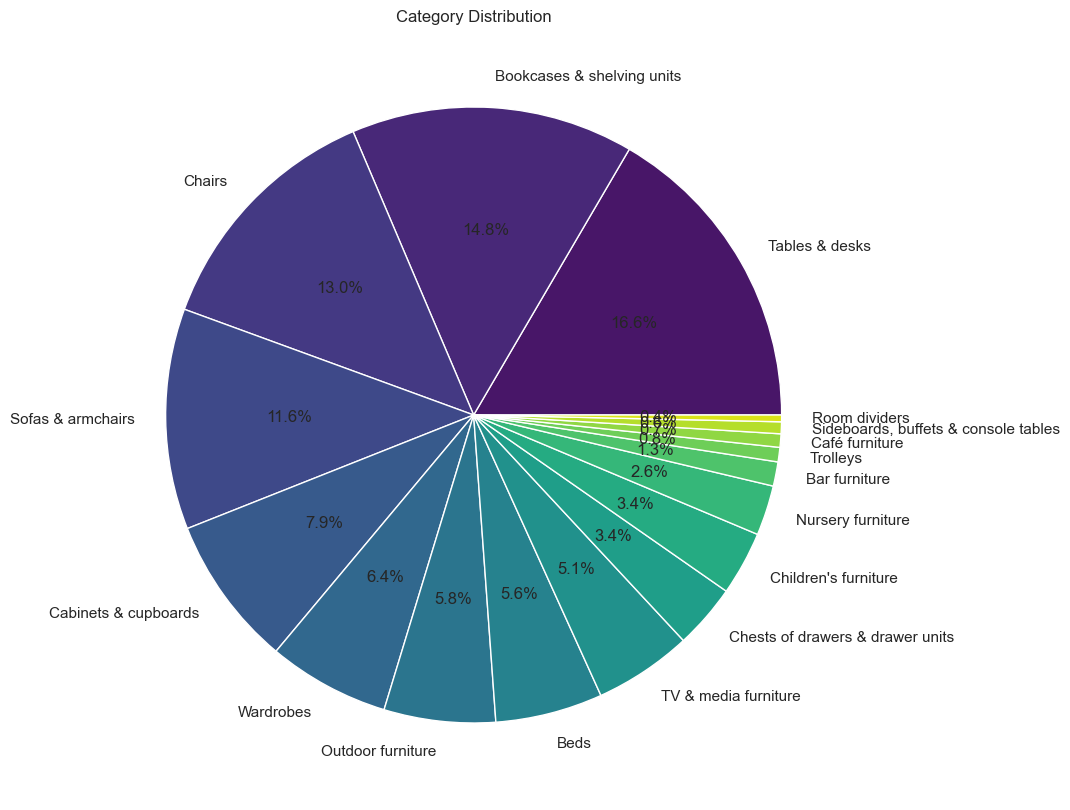

In [201]:
plt.figure(figsize=(10, 10))
file['category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("viridis", len(file['category'].unique())))
plt.ylabel('')
plt.title('Category Distribution')
plt.show()


C:\Users\vika\AppData\Local\Temp\ipykernel_9424\2212958771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


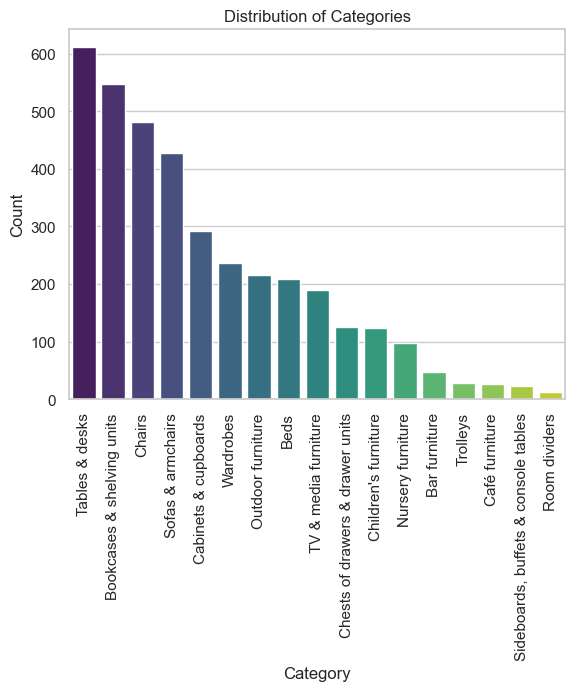

In [202]:
# Підрахунок кількості елементів у кожній категорії
category_counts = file['category'].value_counts()

sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()


C:\Users\vika\AppData\Local\Temp\ipykernel_9424\2013175393.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette="viridis")


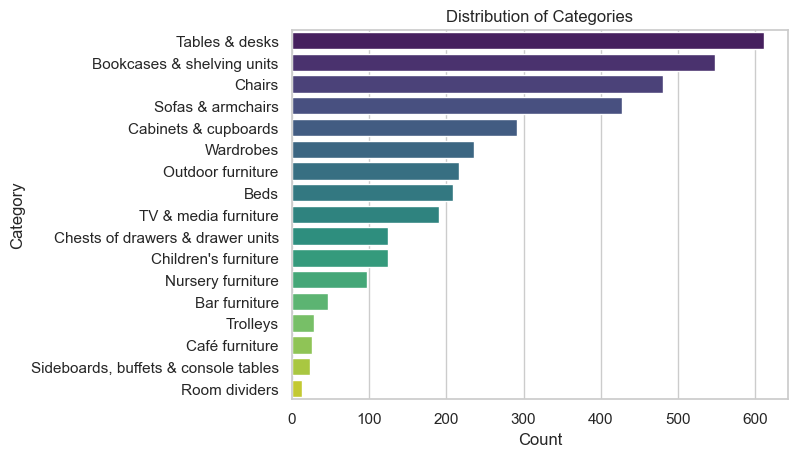

In [203]:
sns.barplot(y=category_counts.index, x=category_counts.values, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Categories')
plt.show()


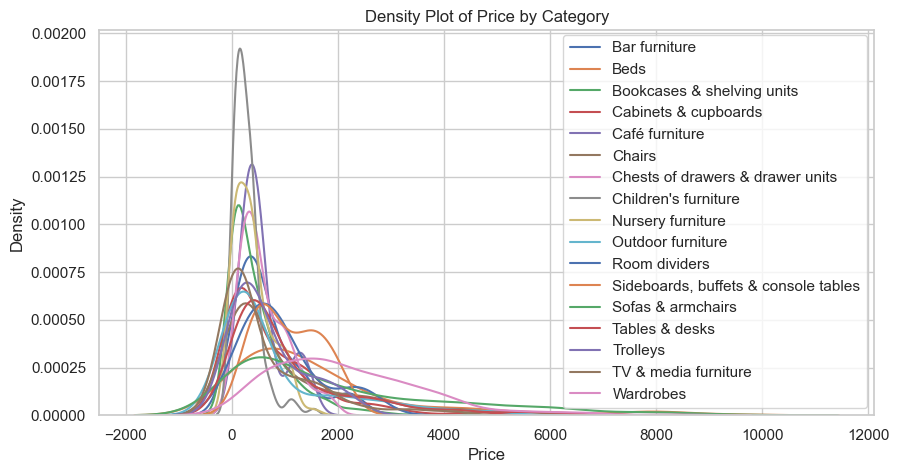

In [204]:
plt.figure(figsize=(10, 5))
for category in file['category'].unique():
    subset = file[file['category'] == category]
    sns.kdeplot(subset['price'], label=category)

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Price by Category')
plt.legend()
plt.show()


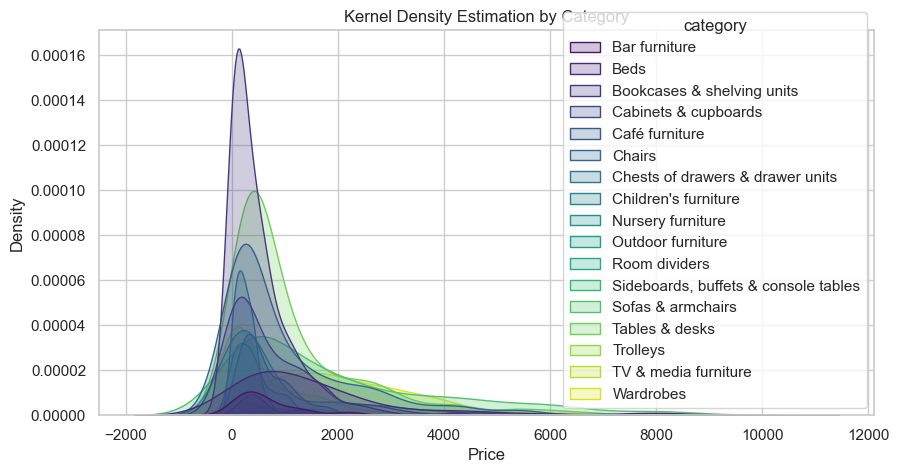

In [205]:
# Побудова графіка щільності ядра з розбиттям за категоріями
plt.figure(figsize=(10, 5))
sns.kdeplot(data=file, x='price', hue="category", fill=True, palette='viridis')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimation by Category')
plt.show()

C:\Users\vika\AppData\Local\Temp\ipykernel_9424\483102657.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='price', data=file, palette="viridis")


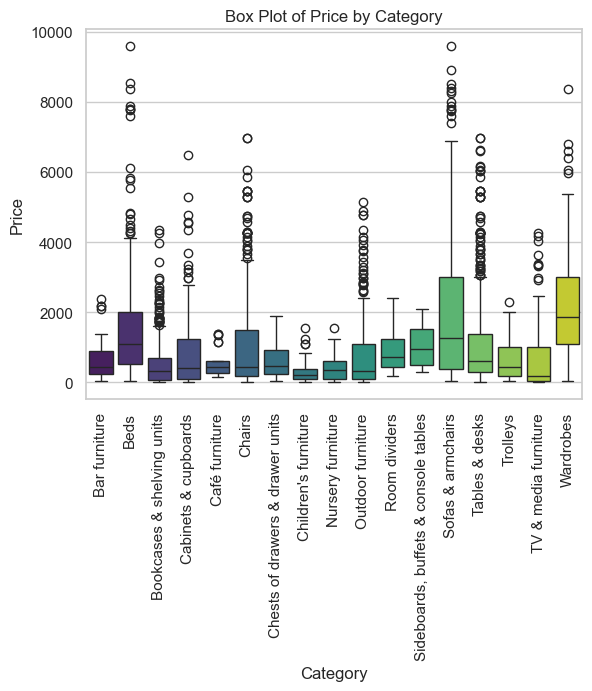

In [206]:
sns.boxplot(x='category', y='price', data=file, palette="viridis")
# Q1 - 25, Q3 - 75 , median
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Box Plot of Price by Category')
plt.show()


C:\Users\vika\AppData\Local\Temp\ipykernel_9424\513628275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=file, palette="viridis")


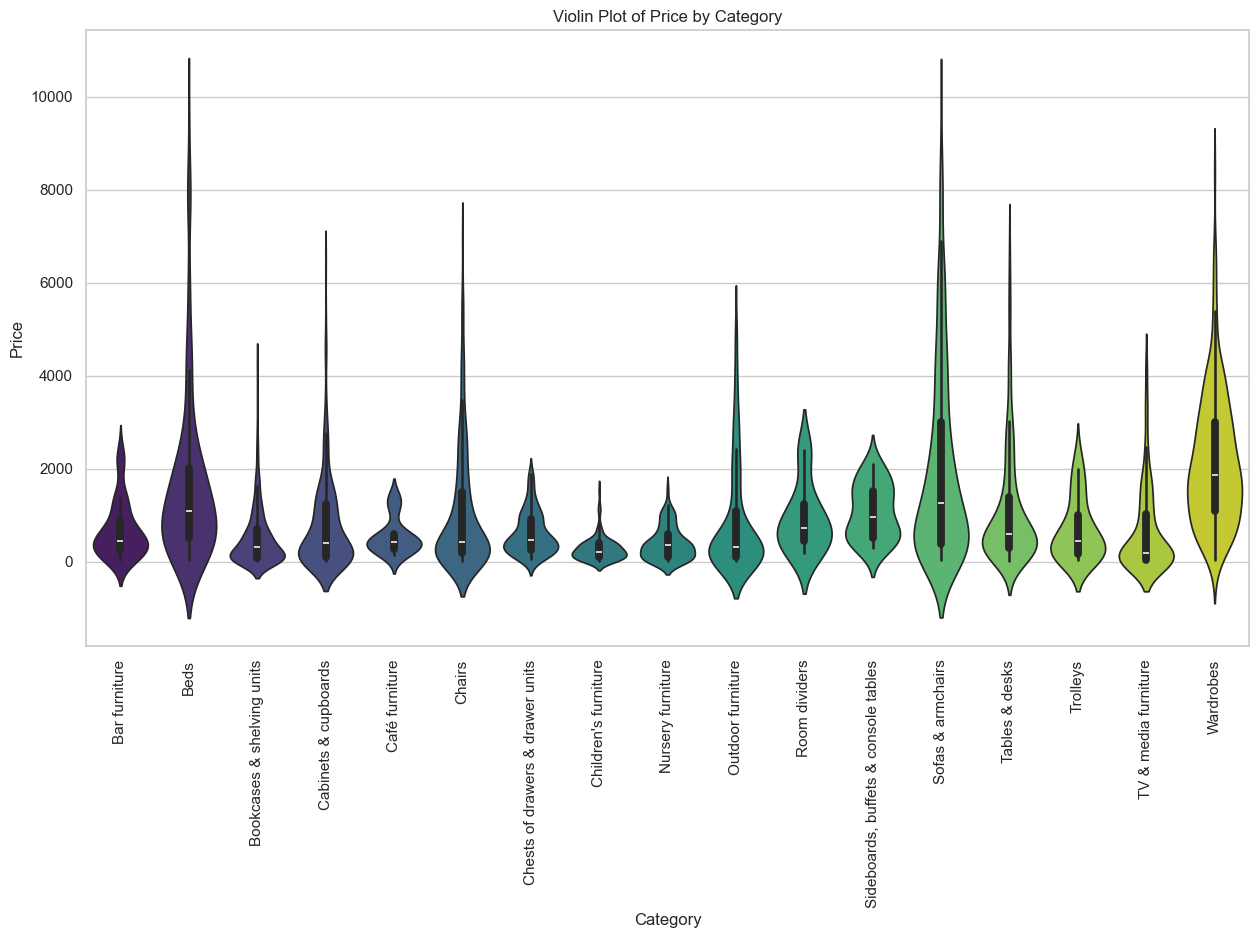

In [207]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='category', y='price', data=file, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Violin Plot of Price by Category')
plt.show()


C:\Users\vika\AppData\Local\Temp\ipykernel_9424\2553127563.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=file, y='category', palette="viridis", order=category_counts.index)


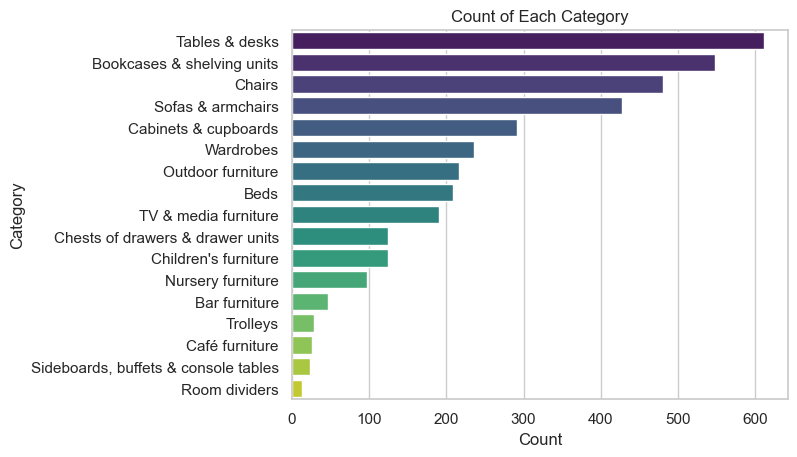

In [208]:
sns.countplot(data=file, y='category', palette="viridis", order=category_counts.index)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Count of Each Category')
plt.show()


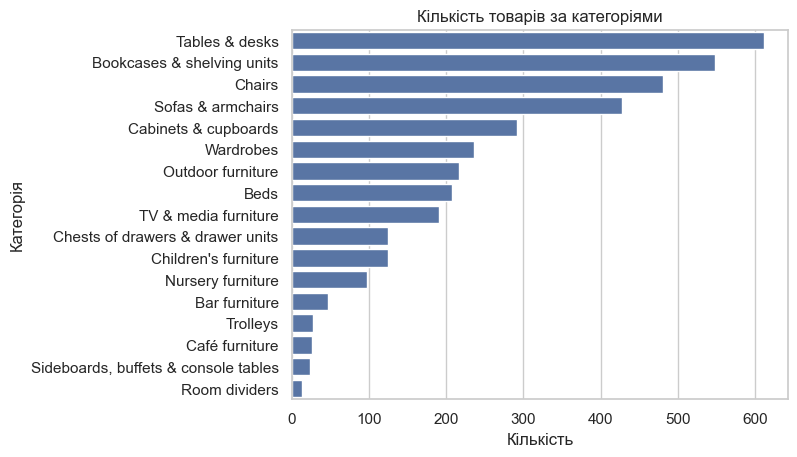

In [209]:
sns.countplot(y='category', data=file, order=file['category'].value_counts().index)
plt.title('Кількість товарів за категоріями')
plt.xlabel('Кількість')
plt.ylabel('Категорія')
plt.show()

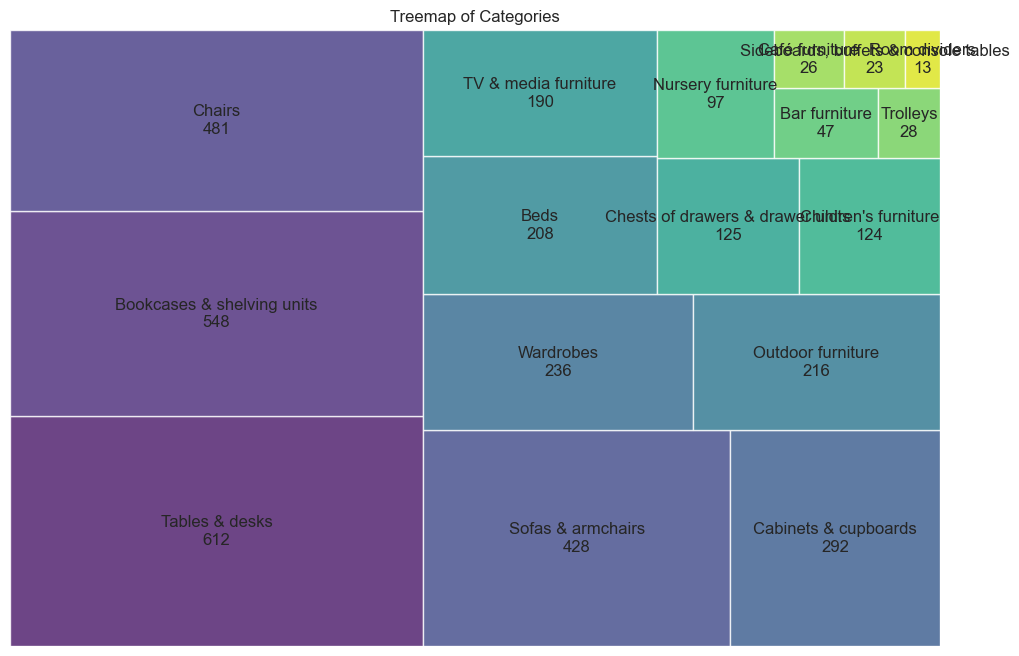

In [251]:
category_counts = file['category'].value_counts()
labels = [f'{label}\n{count}' for label, count in zip(category_counts.index, category_counts.values)]
plt.figure(figsize=(12, 8))
squarify.plot(sizes=category_counts.values, label=labels, alpha=.8, color=sns.color_palette("viridis", len(category_counts)))
plt.axis('off')
plt.title('Treemap of Categories')
plt.show()


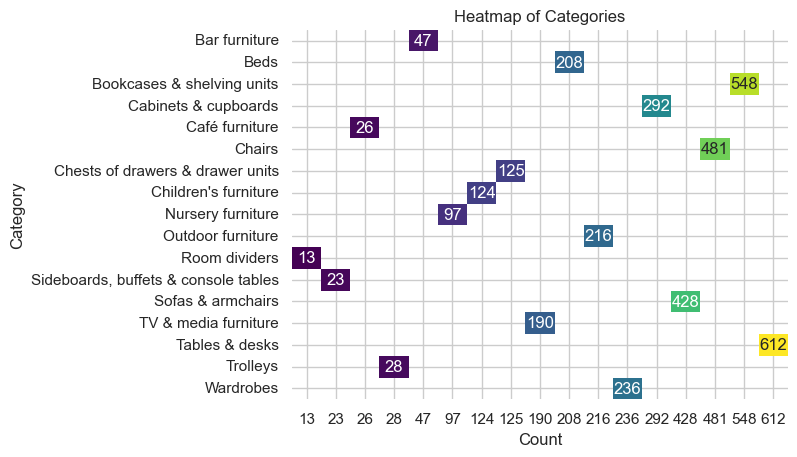

In [211]:
# Підрахунок кількості елементів у кожній категорії
category_counts = file['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Створення зведеної таблиці
pivot_table = category_counts.pivot(index='Category', columns='Count', values='Count')

sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar=False, fmt='.0f')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Heatmap of Categories')
plt.show()

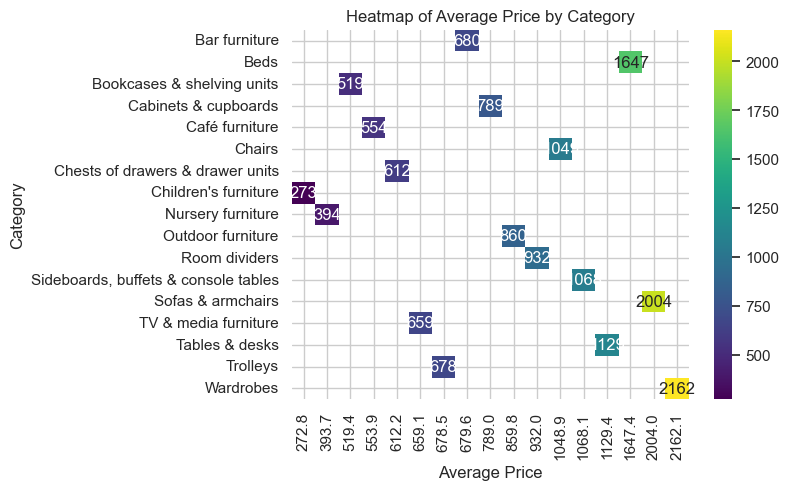

In [212]:
# Підрахунок середньої ціни для кожної категорії
category_price_mean = file.groupby('category')['price'].mean().reset_index().round(1)

# Створення зведеної таблиці
pivot_table = category_price_mean.pivot(index='category', columns='price', values='price')

sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar=True, fmt='.0f')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.title('Heatmap of Average Price by Category')
plt.show()


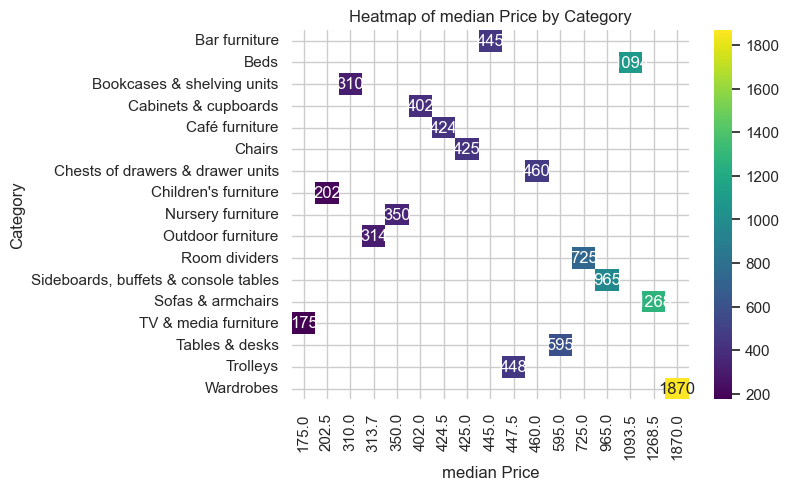

In [213]:
# Підрахунок середньої ціни для кожної категорії
category_price_mean = file.groupby('category')['price'].median().reset_index().round(1)

# Створення зведеної таблиці
pivot_table = category_price_mean.pivot(index='category', columns='price', values='price')

sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar=True, fmt='.0f')
plt.xlabel('median Price')
plt.ylabel('Category')
plt.title('Heatmap of median Price by Category')
plt.show()

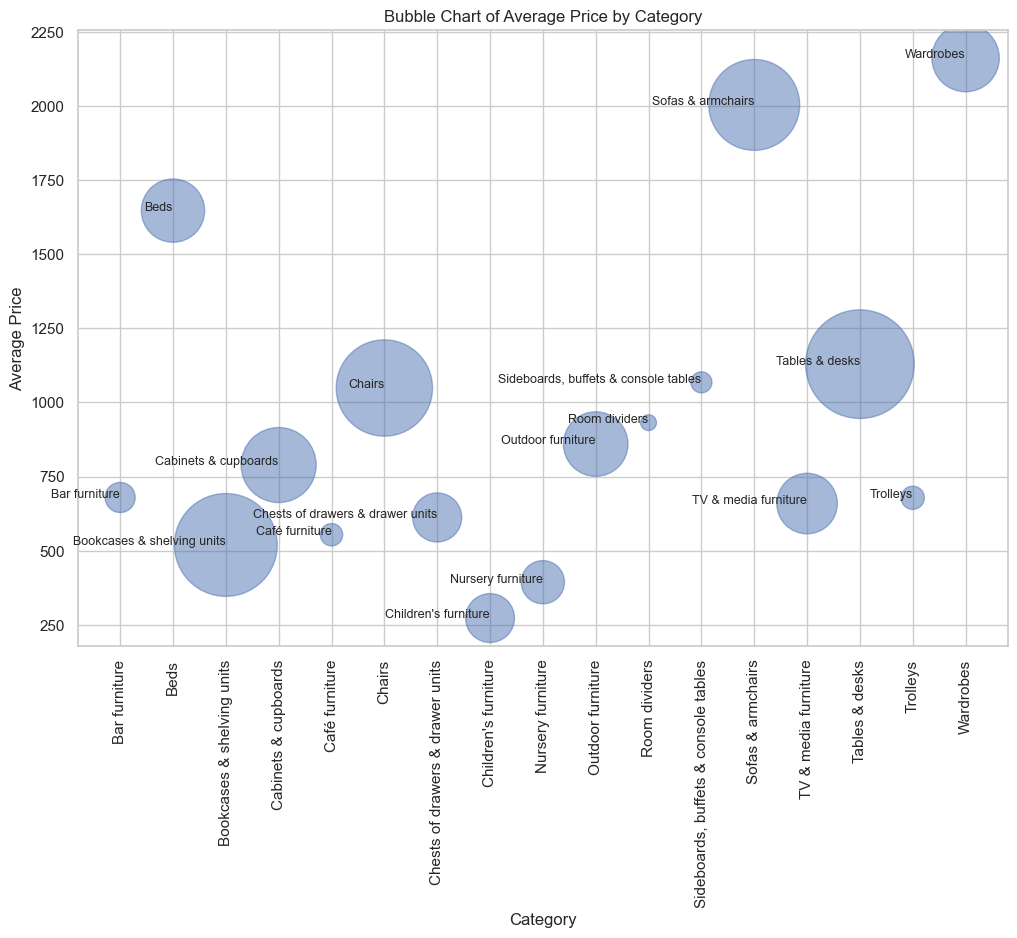

In [214]:
# Підрахунок середньої ціни та кількості елементів у кожній категорії
category_stats = file.groupby('category').agg(Average_Price=('price', 'mean'), Count=('category', 'count')).reset_index()

plt.figure(figsize=(12, 8))
plt.scatter(category_stats['category'], category_stats['Average_Price'], s=category_stats['Count']*10, alpha=0.5, color='b')
for i, row in category_stats.iterrows():
    plt.text(row['category'], row['Average_Price'], row['category'], fontsize=9, ha='right')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Bubble Chart of Average Price by Category')
plt.show()

C:\Users\vika\AppData\Local\Temp\ipykernel_9424\793114405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=file, inner=None, palette="viridis")
e:\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Python\Py

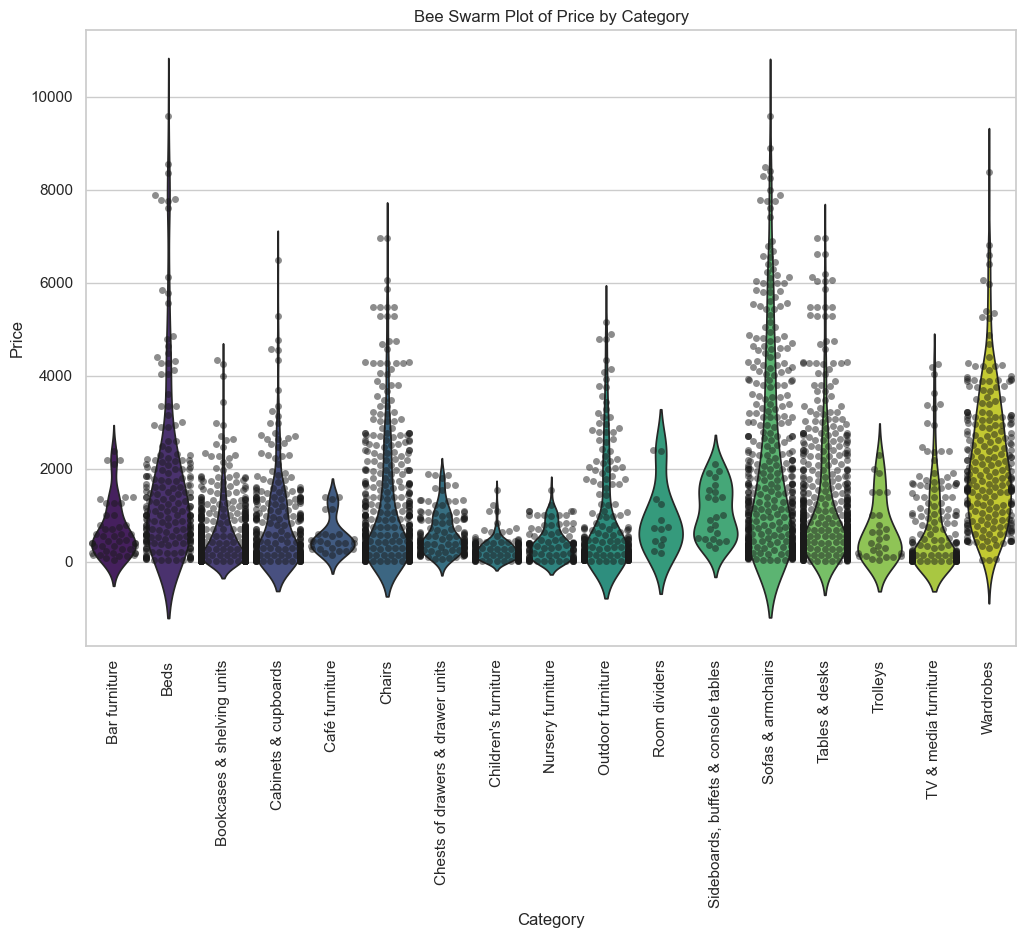

In [215]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=file, inner=None, palette="viridis")
sns.swarmplot(x='category', y='price', data=file, color='k', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Bee Swarm Plot of Price by Category')
plt.show();


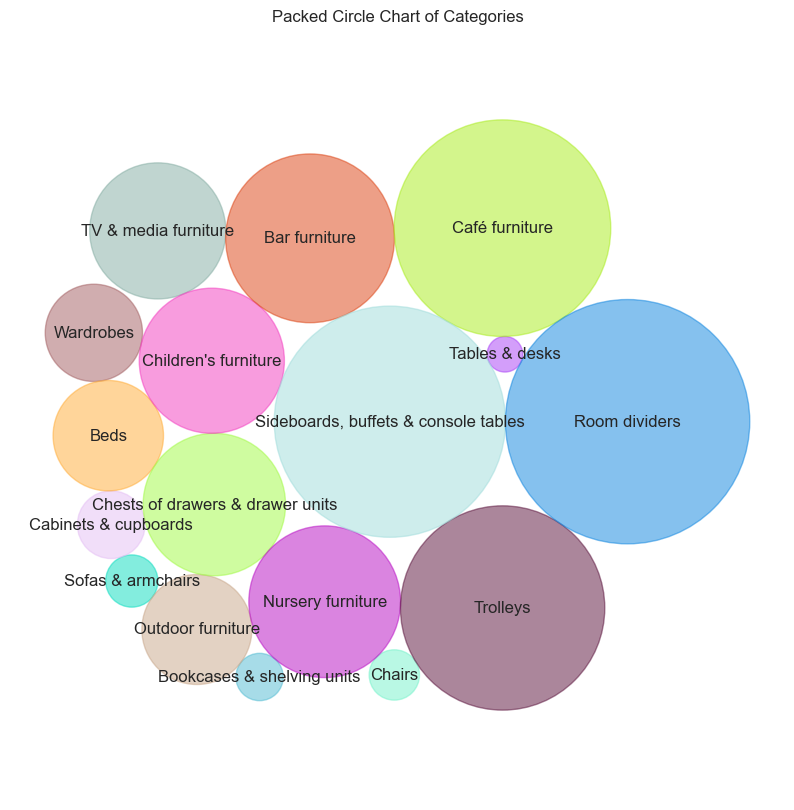

In [216]:
# Підрахунок кількості елементів у кожній категорії
category_counts = file['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

circles = circlify(category_counts['Count'].tolist(), show_enclosure=False)
labels = category_counts['Category'].tolist()

fig, ax = plt.subplots(figsize=(10, 10))

# Малювання кругів
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5, color=np.random.rand(3,)))

    plt.annotate(label, (x, y), size=12, va='center', ha='center')

plt.title('Packed Circle Chart of Categories')
plt.axis('equal')
plt.axis('off')
plt.show()


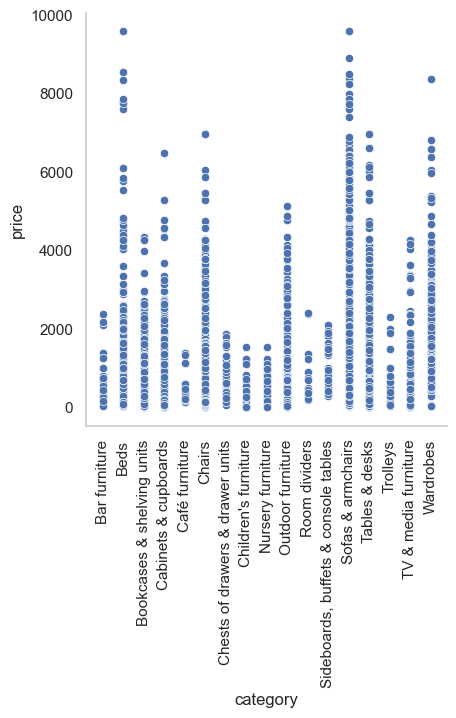

In [235]:
sns.relplot(x = 'category', y = 'price', data = file);
plt.xticks(rotation=90)
plt.grid()

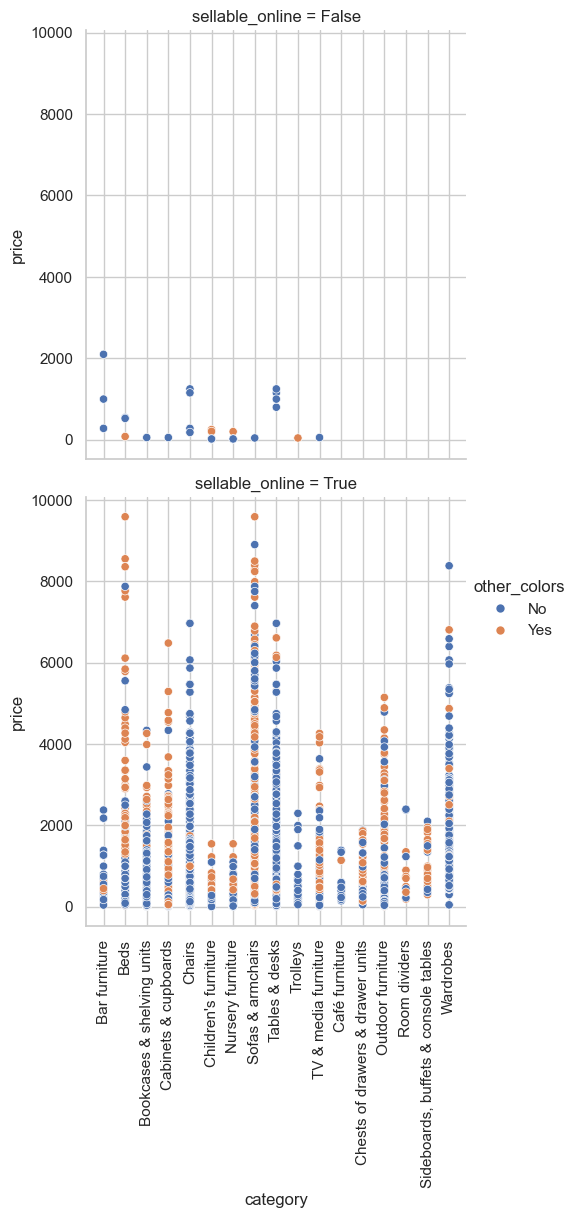

In [233]:
sns.relplot(x = 'category', y = 'price', data = file, hue="other_colors",  row="sellable_online")
plt.xticks(rotation=90)
plt.show()

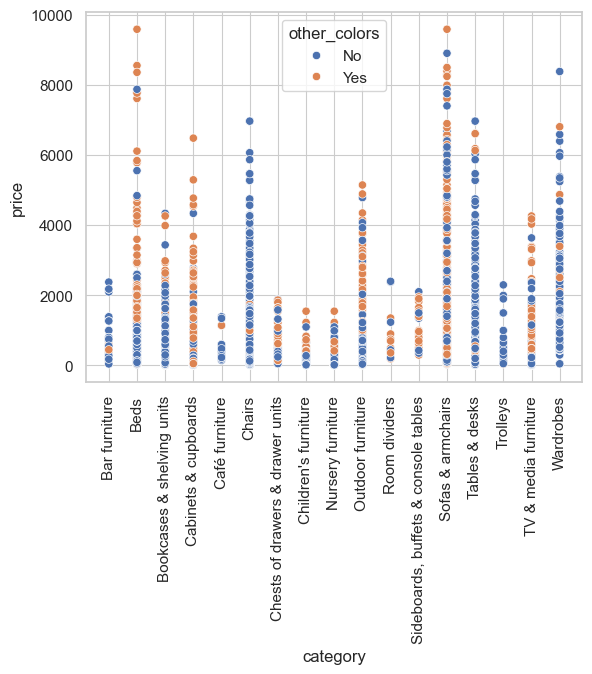

In [232]:
sns.scatterplot(x = 'category', y = 'price', data = file, hue="other_colors");
plt.grid( linewidth = 0.8)
plt.xticks(rotation=90)
plt.show()

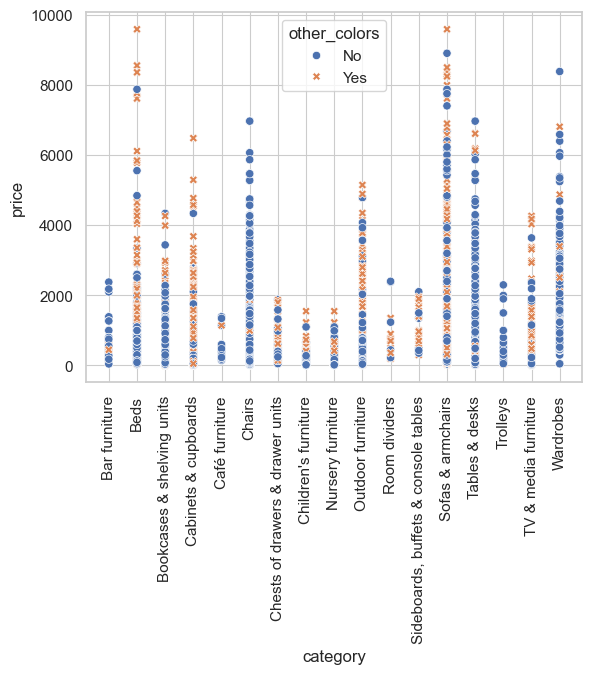

In [231]:
sns.scatterplot(x = 'category', y = 'price', data = file, hue="other_colors", style = 'other_colors' );
plt.grid( linewidth = 0.8)
plt.xticks(rotation=90)
plt.show()

e:\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.9% of the points cannot be placed; you ma

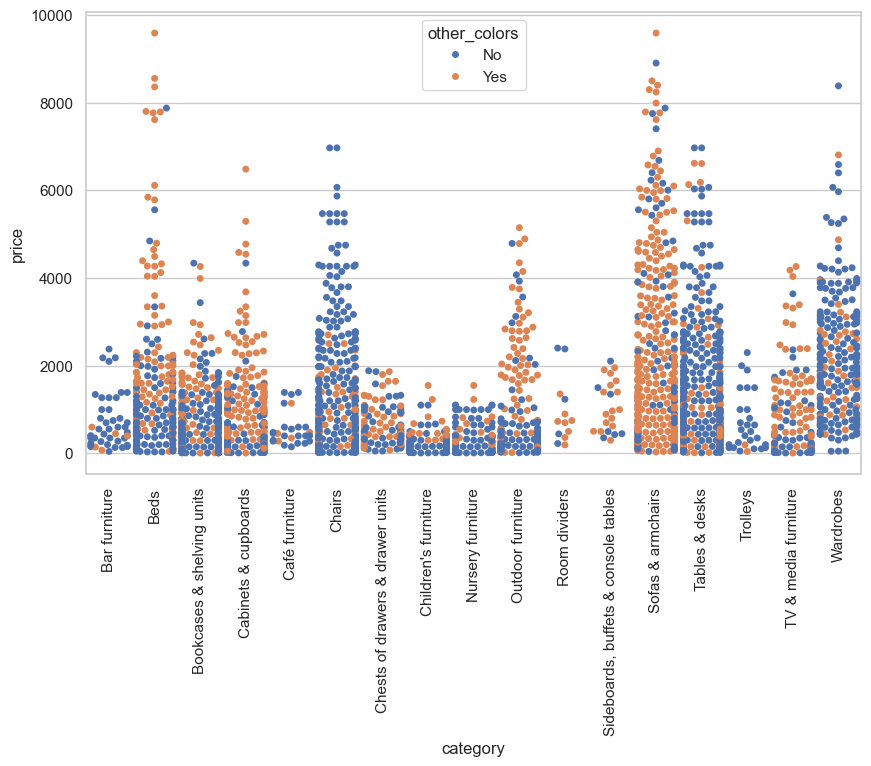

In [246]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')

sns.swarmplot(x = 'category', y = 'price', data = file, hue="other_colors");
plt.xticks(rotation=90)
plt.show()

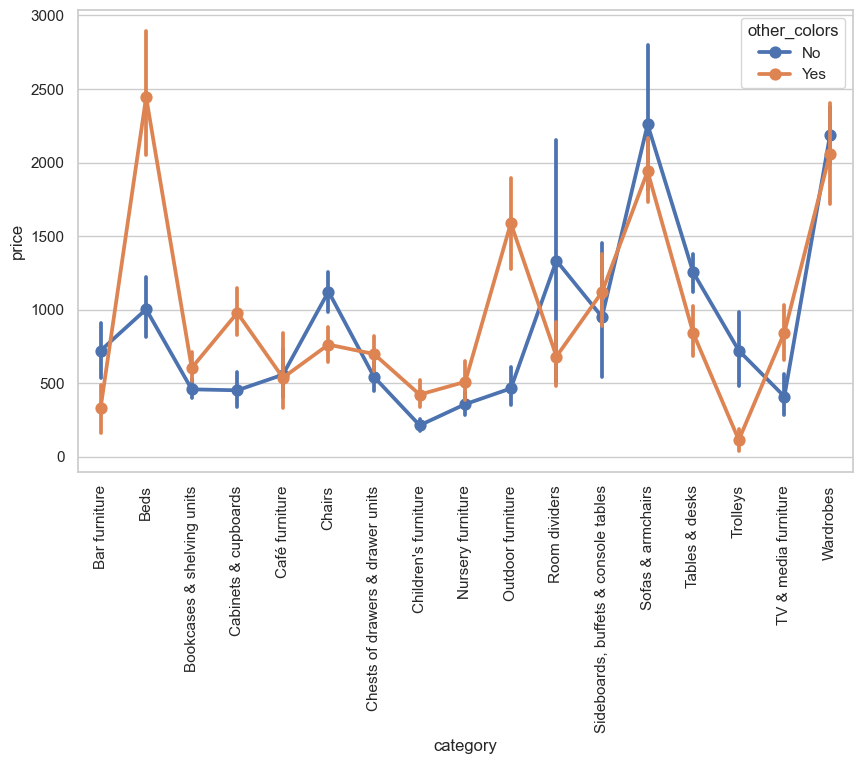

In [245]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')

sns.pointplot(x = 'category', y = 'price', data = file, hue="other_colors");
plt.xticks(rotation=90)
plt.show()